In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (14, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Loading Dataset

In [4]:
df = pd.read_csv("Customers.csv")

Visualization data

In [5]:
fig = px.histogram(df,x='Family Size',y='Spending Score',nbins=40,title="Relationship between family size and spending score")
fig.update_layout(bargap = 0.2)
fig.show()

In [6]:
px.histogram(df, x='Gender',
            y = 'Spending Score',
            title='Relationship between spending score and gender',
            color='Gender')

In [7]:
px.violin(df,x='Gender',y='Annual Income',color='Gender',title="Annual income vs gender")

In [8]:
px.scatter(df,x='Annual Income',y = 'Spending Score',color='Gender',title="Annual income vs spending score")

Correlation between annual income and spending score

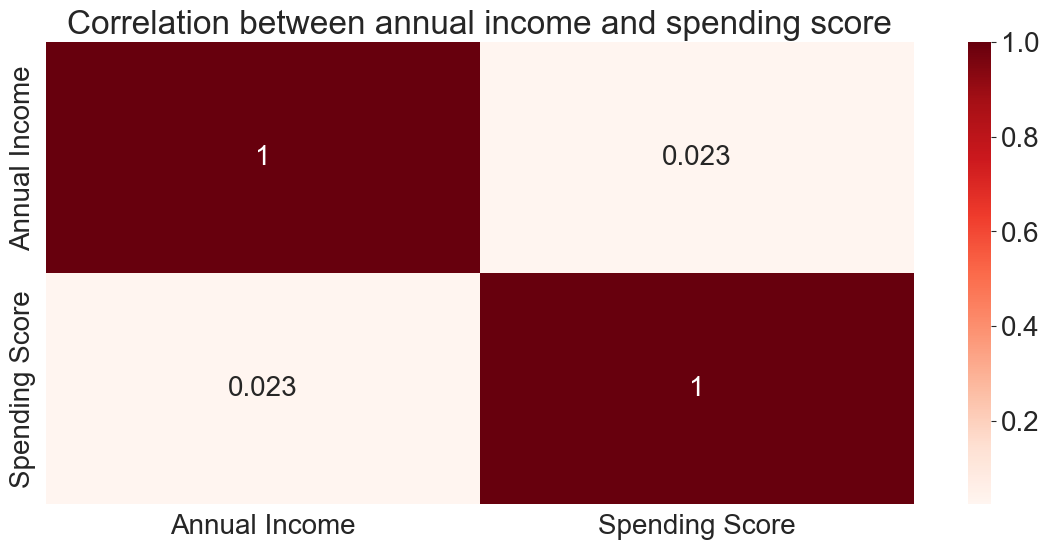

In [9]:
input_data = ['Annual Income','Spending Score']
sns.heatmap(df[input_data].corr(),cmap = 'Reds',annot=True)
plt.title("Correlation between annual income and spending score")
plt.show()

Preprocessing Data

In [10]:
# Min-max scale
data = df[input_data].copy()
data = ((data - data.min())/(data.max() - data.min()))*9 + 1
data

,Annual Income,Spending Score
0,1.710624,4.51
1,2.658122,8.29
2,5.074242,1.54
3,3.795119,7.93
4,2.800246,4.60
...,...,...
1995,9.735316,4.60
1996,4.465853,3.88
1997,5.309269,2.26
1998,9.627396,1.36


In [11]:
data = data.values

# K-means algorithms

Create random centroids

In [12]:
def random_centroids(data,k):
    centroids = data[np.random.choice(data.shape[0],k, replace=False)]
    return centroids

Get labels

In [13]:
def get_labels(data,centroids,k):
    distances = np.zeros((data.shape[0], k))
    for i in range(k):
        distances[:, i] =  np.linalg.norm(data - centroids[i], axis=1)
    labels = np.argmin(distances, axis=1)
    return labels

Update centroids

In [14]:
def new_centroids(data,labels,k):
    centroids = np.empty((k,2))
    for i in range(k):
        centroids[i] = np.mean(data[labels == i], axis=0)
    return centroids

Plot K-means Iterations

In [17]:
from IPython.display import clear_output

def plot_clusters(data,labels,centroids,iteration):
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data[:,0],y=data[:,1],c=labels,cmap='viridis')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.scatter(x=centroids[:,0],y=centroids[:,1],marker="*",color = 'red',s = 100)
    plt.show()

Pulling algorithms together

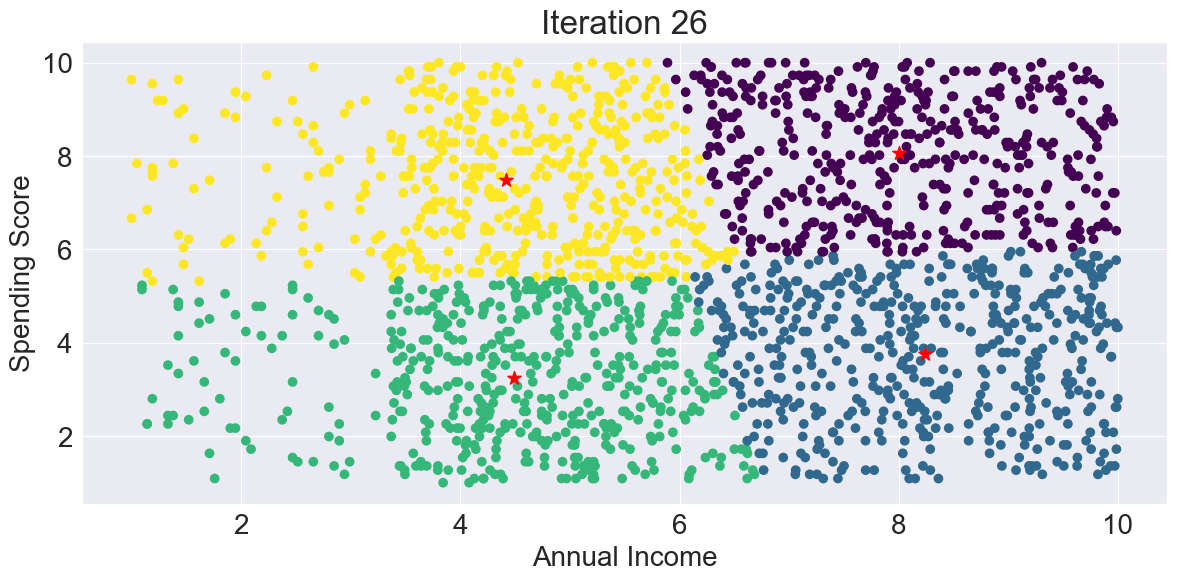

In [18]:
max_iterations = 100
k = 4
centroids = random_centroids(data,k)
iteration = 1
old_centroids = np.empty((k,2))
while iteration < max_iterations and not np.allclose(old_centroids,centroids):
    old_centroids = centroids
    labels = get_labels(data,centroids,k)
    centroids = new_centroids(data=data,labels=labels,k=k)
    plot_clusters(data,labels,centroids,iteration)
    iteration += 1